# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('tips.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [123]:
df = df.drop('Unnamed: 0',axis =1)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [124]:
print('dữ liệu có số dòng là: ',df.shape[0])
print('dữ liệu có số thuộc tính là: ',df.shape[1])

dữ liệu có số dòng là:  244
dữ liệu có số thuộc tính là:  7


In [125]:
#4
df.dtypes


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [126]:
soNam = (df['sex'] == 'Male').sum()
tiLeNam = soNam/df['sex'].count()
print(f'số nam {soNam:.2f} tỉ lệ nam {tiLeNam:.2f}')
soNu = df['sex'].count() - soNam

print(f'số nữ {soNu:.2f} tỉ lệ nữ {1-tiLeNam:.2f}')


số nam 157.00 tỉ lệ nam 0.64
số nữ 87.00 tỉ lệ nữ 0.36


In [127]:
soNguoiHutThuoc = (df['smoker'] == 'Yes').sum()
tiLeHutThuoc = soNguoiHutThuoc/df.shape[0]
print(f'số người hút thuốc: {soNguoiHutThuoc}, chiếm tỉ lệ: {tiLeHutThuoc}')

số người hút thuốc: 93, chiếm tỉ lệ: 0.38114754098360654


In [128]:
ngayTrongTuanKhachHayDungBua = (df['day'].value_counts())
print(ngayTrongTuanKhachHayDungBua.idxmax(), '-',ngayTrongTuanKhachHayDungBua.max())

Sat - 87


In [129]:
#Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
buaAnDuocPhucVuNhieuNhat = df['time'].value_counts()
print(buaAnDuocPhucVuNhieuNhat.idxmax(),'-',buaAnDuocPhucVuNhieuNhat.max())

Dinner - 176


In [130]:

#Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
soNguoiNhieuNhat = df['size'].max()
print('số người nhiều nhất 1 bàn mà nhà hàng phục vụ là: ',soNguoiNhieuNhat)


số người nhiều nhất 1 bàn mà nhà hàng phục vụ là:  6


In [131]:
soNguoiTrungBinh = df['size'].mean()
print(f'trung bình 1 bữa ăn nhà hàng phục vụ cho {soNguoiTrungBinh:.1f} khách')

trung bình 1 bữa ăn nhà hàng phục vụ cho 2.6 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [132]:
soLanDuocTips = (df['tip'] > 0).sum()
tiLeNhanTips = soLanDuocTips/df.shape[0]
print('tỉ lệ tips là: ',tiLeNhanTips*100,'%')

tỉ lệ tips là:  100.0 %


In [133]:
tiLeTienTips_tongHoaDon = (df['tip']/df['total_bill']).mean()
print(f'tỉ lệ tiền tips trên tổng hóa đơn là: {tiLeTienTips_tongHoaDon*100 : .2f}%')


tỉ lệ tiền tips trên tổng hóa đơn là:  16.08%


In [134]:
tip_trungBinh_gioiTinh = df.groupby('sex')['tip'].mean()
print(f'trung bình tiền tips theo giới tính: {tip_trungBinh_gioiTinh}')

trung bình tiền tips theo giới tính: sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [135]:
df["tiLeTip"] = df["tip"] / df["total_bill"] * 100
print("\nTỷ lệ % tip so với hoá đơn theo giới tính:")
print(df.groupby("sex")["tiLeTip"].mean())



Tỷ lệ % tip so với hoá đơn theo giới tính:
sex
Female    16.649074
Male      15.765055
Name: tiLeTip, dtype: float64


In [136]:
tip_hutThuoc = df.groupby('smoker')['tip'].mean()
tip_hutThuoc




smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [137]:
df['tiLetip_smoke'] = df['tip']/df['total_bill'] *100
print(f'tỉ lệ % tips so với hóa đơn của người hút thuốc và không hút thuốc')
df.groupby('smoker')['tiLetip_smoke'].mean()


tỉ lệ % tips so với hóa đơn của người hút thuốc và không hút thuốc


smoker
No     15.932846
Yes    16.319604
Name: tiLetip_smoke, dtype: float64

In [138]:
#Thống kê tổng số tiền tip nhận được theo ngày.

tien_tip_theoNgay = df.groupby('day')['tip'].sum()
tien_tip_theoNgay

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

Text(0.5, 1.0, 'tổng tip theo ngày')

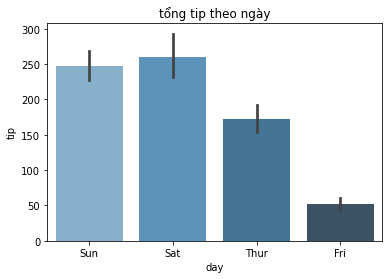

In [139]:
sns.barplot(x="day", y="tip", data=df, estimator=sum, palette="Blues_d")
plt.title('tổng tip theo ngày')

<AxesSubplot:xlabel='time', ylabel='tip'>

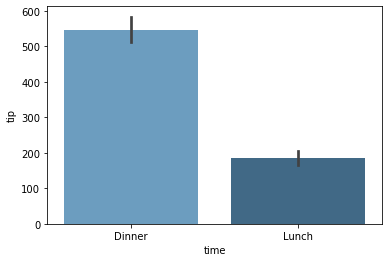

In [140]:
sns.barplot(x="time", y="tip", data=df, estimator=sum, palette="Blues_d")

Text(0.5, 0, 'tổng hóa đơn')

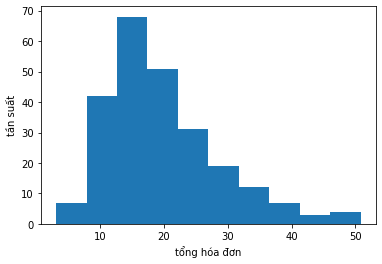

In [141]:
plt.hist(df['total_bill'])
plt.ylabel('tần suất')
plt.xlabel('tổng hóa đơn')

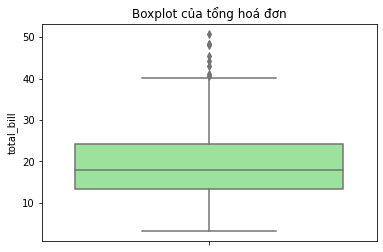

In [142]:
plt.figure(figsize=(6,4))
sns.boxplot(y="total_bill", data=df, color="lightgreen")
plt.title("Boxplot của tổng hoá đơn")
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

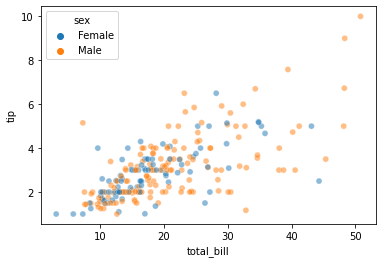

In [143]:
sns.scatterplot(x = 'total_bill', y = 'tip', data= df,hue= 'sex',alpha=0.5)

<AxesSubplot:xlabel='day', ylabel='sum_all'>

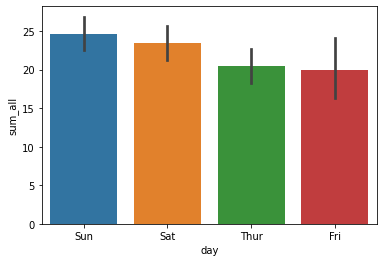

In [144]:
df['sum_all'] = df['total_bill'] + df['tip']
sns.barplot(x = 'day', y = 'sum_all', data= df)

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib


Vẽ đồ thị thể hiện tổng tiền tip theo ngày  
Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)  
Vẽ đồ thị histogram của tổng hoá đơn  
Vẽ đồ thị boxplot của tổng hoá đơn  
Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.  
So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.  


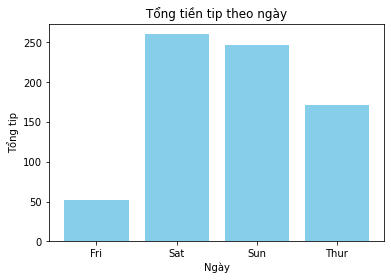

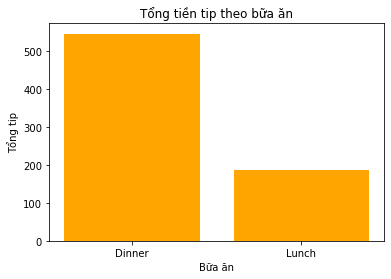

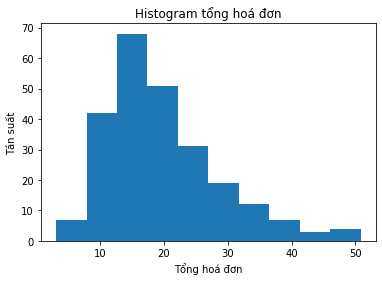

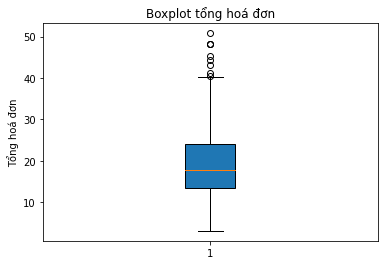

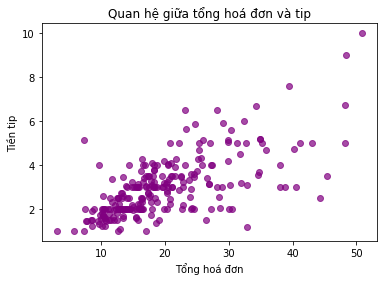

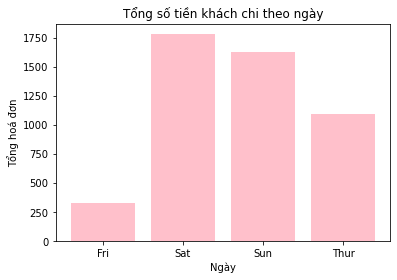

In [145]:

tip_by_day = df.groupby("day")["tip"].sum()
plt.figure(figsize=(6,4))
plt.bar(tip_by_day.index, tip_by_day.values, color="skyblue")
plt.title("Tổng tiền tip theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng tip")
plt.show()

tip_by_time = df.groupby("time")["tip"].sum()
plt.figure(figsize=(6,4))
plt.bar(tip_by_time.index, tip_by_time.values, color="orange")
plt.title("Tổng tiền tip theo bữa ăn")
plt.xlabel("Bữa ăn")
plt.ylabel("Tổng tip")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["total_bill"])
plt.title("Histogram tổng hoá đơn")
plt.xlabel("Tổng hoá đơn")
plt.ylabel("Tần suất")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df["total_bill"], vert=True, patch_artist=True)
plt.title("Boxplot tổng hoá đơn")
plt.ylabel("Tổng hoá đơn")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["total_bill"], df["tip"], alpha=0.7, c="purple")
plt.title("Quan hệ giữa tổng hoá đơn và tip")
plt.xlabel("Tổng hoá đơn")
plt.ylabel("Tiền tip")
plt.show()

bill_by_day = df.groupby("day")["total_bill"].sum()
plt.figure(figsize=(6,4))
plt.bar(bill_by_day.index, bill_by_day.values, color="pink")
plt.title("Tổng số tiền khách chi theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng hoá đơn")
plt.show()


## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

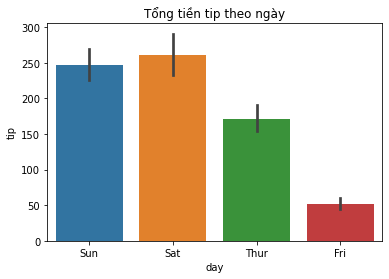

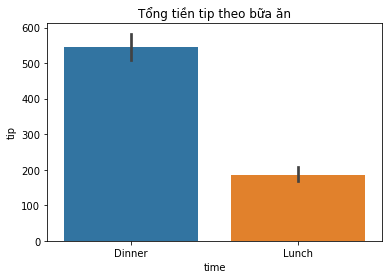

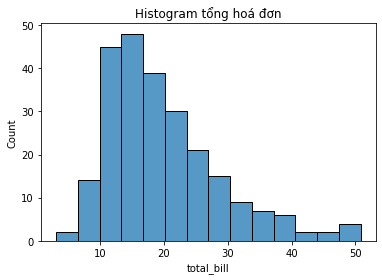

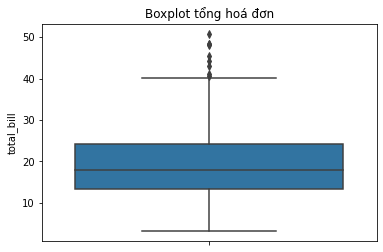

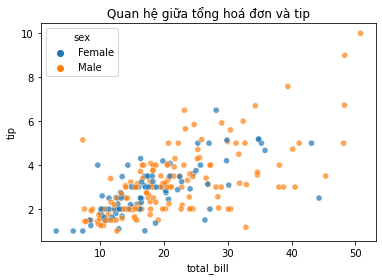

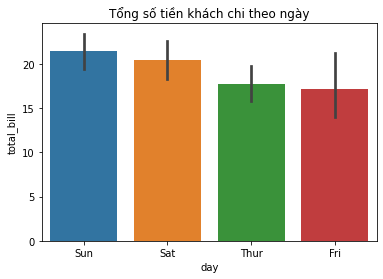

In [146]:


plt.figure(figsize=(6,4))
sns.barplot(x="day", y="tip", data=df, estimator=sum)
plt.title("Tổng tiền tip theo ngày")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="time", y="tip", data=df, estimator=sum)
plt.title("Tổng tiền tip theo bữa ăn")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["total_bill"])
plt.title("Histogram tổng hoá đơn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y="total_bill", data=df)
plt.title("Boxplot tổng hoá đơn")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="total_bill", y="tip", data=df, hue="sex", alpha=0.7)
plt.title("Quan hệ giữa tổng hoá đơn và tip")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="day", y="total_bill", data=df)
plt.title("Tổng số tiền khách chi theo ngày")
plt.show()


In [147]:
df = pd.read_csv('flights.csv')
df.head()

,Unnamed: 0,year,month,passengers
0,0,1949,January,112
1,1,1949,February,118
2,2,1949,March,132
3,3,1949,April,129
4,4,1949,May,121


In [148]:
df = df.drop('Unnamed: 0',axis =1)
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [151]:
tongHanhKhachTheoThang = df.groupby('month')['passengers'].sum()
tongHanhKhachTheoThang

month
April        3205
August       4213
December     3142
February     2820
January      2901
July         4216
June         3740
March        3242
May          3262
November     2794
October      3199
September    3629
Name: passengers, dtype: int64

In [152]:
tongHanhKhachTheoNam = df.groupby('year')['passengers'].sum()
print(tongHanhKhachTheoNam)

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64


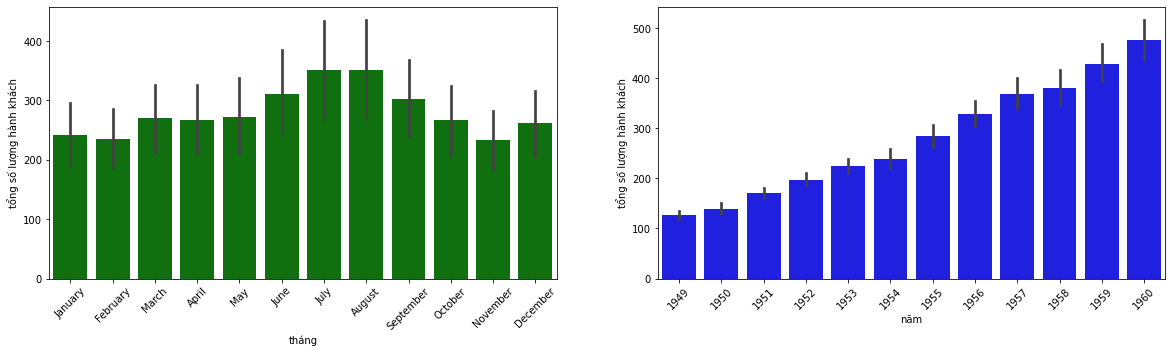

In [159]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='month', y = 'passengers', data = df, color='green')
plt.xlabel('tháng')
plt.ylabel('tổng số lượng hành khách')
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.barplot(x='year', y = 'passengers', data = df,color='blue')
plt.xlabel('năm')
plt.ylabel('tổng số lượng hành khách')
plt.xticks(rotation = 45)
plt.show()

In [170]:
df = pd.read_csv('babies.txt',sep ='\s+')
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [171]:
print(df.columns)


Index(['bwt', 'smoke'], dtype='object')


In [177]:
thongKe = df.groupby('smoke')['bwt'].mean()
thongKe

smoke
0    123.047170
1    114.109504
9    126.700000
Name: bwt, dtype: float64

<AxesSubplot:xlabel='smoke', ylabel='bwt'>

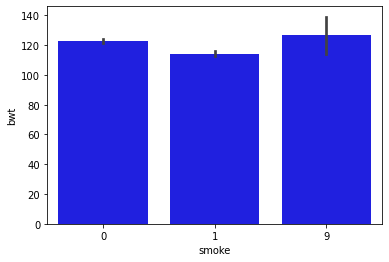

In [179]:
sns.barplot(x='smoke',y = 'bwt', data = df, color ='blue')

<BarContainer object of 3 artists>

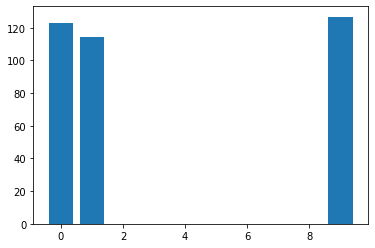

In [181]:
plt.bar(thongKe.index,thongKe.values, data= df)